# Building the design matrix - TBSS F-model full dataset BSC (3 groups)

The objective of this analysis was to show consistency with results obtained with TBSS by reproducing them using SPM.

In [1]:
%run /home/grg/git/alfa/nilearn-helper.py
%run /home/grg/git/alfa/build_matrix.py
%matplotlib inline

/home/grg/jupyter/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
cov = pd.read_excel('/tmp/covariates.xls')
cov_subjects = set(cov['subject'].tolist())

wd = '/tmp/bsc_data2/'
images = sorted(glob(osp.join(wd, '*nii.gz')))
#images.remove(osp.join(wd, 'mean_FA_skeleton_mask.nii'))

subjects = [string.atoi(osp.basename(each).split('_')[0]) for each in images]
#exclusion = [10186, 10511, 10775, 12330, 12542, 12851, 44027, 55278, 66171, 66211, 10084, 11223, 55809, 10294, 10552, 13163, 13164, 
#             44027, 44086, 10586, 10947, 11016, 44733, 10448, 12156, 44086, 66294, 77051, 11526, 66029, 66215, 10966]

#subjects2 = []
#images2=[]
#for each, each2 in zip(subjects, images):
#    if each in cov_subjects and not each in exclusion:
#        subjects2.append(each)
#        images2.append(each2)
#    else:
#        print each
#subjects = subjects2
#images = images2
len(subjects), len(images)

(383, 383)

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('/tmp/alfa.xlsx', sheetname='Alomar')

df['subject'] = df['ID OpenClinica']
df['age'] = df['age in days']/365.25
df['apoe'] = df['ApoE']
df['gender'] = df['Sexo']
df = df.replace({'gender':{'Masculino':1, 'Femenino':0}})
df = df.replace({'apoe':{'apoenan':np.nan}})
print df[df['subject']==10113]
df = df.dropna()
df = df[['subject', 'age', 'apoe', 'gender']]
df.to_excel('/tmp/covariates.xls')
df.head()

IOError: [Errno 2] No such file or directory: '/tmp/alfa.xlsx'

In [147]:
cov.to_excel('/tmp/covariates.xls')

In [146]:
#df = pd.read_excel('/tmp/covariates.xls')
df = cov
df2 = pd.read_excel('/tmp/alfa3.xls')[['subject2', 'education']]
df = df.set_index(df['subject']).join(df2.set_index(df2['subject2']))
del df['subject']
del df['subject2']
df = df.dropna()
cov.to_excel('/tmp/covariates.xls')
df.head()
len(df)

ValueError: columns overlap but no suffix specified: Index([u'education'], dtype='object')

In [14]:
cov.head()

,subject,age,apoe,gender,education
0,10010,52.698152,2,1,18
1,10013,55.414100,2,0,11
2,10015,50.707734,1,0,17
3,10016,48.583162,3,0,17
4,10019,60.487337,0,1,18


In [7]:
data = build_matrix(images, ['apoe', 'age', 'gender'], cov, subjects=subjects)
data['subject'] = [int(e) for e in subjects]

data = data.set_index('subject')

d = {0:0, 1:1, 2:0, 3:1, 4:2}
ht = {0:-1, 1:2, 2:-1, 3:2, 4:-1}
groups = [d[e] for e in data['apoe'].values]
htg = [ht[e] for e in data['apoe'].values]
#data['agesq'] = data['age']**2

data['groups'] = pd.Series(groups, index=subjects)
#data['ht_status'] = pd.Series(htg, index=subjects)

data = build_dummy(data, 'groups')

#data = build_interaction(data, 'age', 'groups')

del data['apoe']
del data['images']

#del data[0]
#del data[1]
#del data[2]
#del data['groups']
#del data['age']
#data.head()
mean = np.mean(data['age'])
data['age'] = data['age'] - mean
data['age0'] = data[0] * data['age']
data['age1'] = data[1] * data['age']
data['age2'] = data[2] * data['age']
del data[0]
del data[1]
del data[2]
del data['age']
#data['ht_status'] = data['ht_status'] * data['age']

columns = ['groups', 'gender', 'age0', 'age1', 'age2']
data = pd.DataFrame(data)
for e in subjects:
    print ' '.join([str(each) for each in data.loc[e][columns].values])
data.head()
#print len(data)
#data.to_excel('/tmp/tbss_designmat.xls')

0.0 1.0 -6.19166742619 -0.0 -0.0
0.0 0.0 -3.47571944535 -0.0 -0.0
1.0 0.0 -0.0 -10.3066571592 -0.0
0.0 1.0 2.17520457929 0.0 0.0
0.0 0.0 -9.48803977389 -0.0 -0.0
1.0 1.0 0.0 7.71935242323 0.0
1.0 0.0 0.0 7.80970149921 0.0
0.0 1.0 2.23269944582 0.0 0.0
1.0 0.0 -0.0 -8.45587002715 -0.0
0.0 0.0 -3.50309795322 -0.0 -0.0
1.0 0.0 -0.0 -9.6139809101 -0.0
1.0 0.0 -0.0 -8.76524716609 -0.0
0.0 0.0 -7.72486386698 -0.0 -0.0
0.0 0.0 -11.5003601024 -0.0 -0.0
0.0 0.0 -4.15196858977 -0.0 -0.0
0.0 0.0 -1.14033272393 -0.0 -0.0
0.0 1.0 -1.53732108806 -0.0 -0.0
1.0 1.0 0.0 7.67280895985 0.0
0.0 0.0 -3.41822457882 -0.0 -0.0
0.0 0.0 -8.77346071845 -0.0 -0.0
0.0 0.0 -4.76524716609 -0.0 -0.0
2.0 1.0 -0.0 -0.0 -11.59618488
2.0 0.0 -0.0 -0.0 -8.07804661852
0.0 1.0 4.14371929524 0.0 0.0
2.0 1.0 -0.0 -0.0 -7.91651342208
1.0 0.0 -0.0 -7.22657502372 -0.0
1.0 1.0 -0.0 -7.97400828861 -0.0
0.0 0.0 4.11907863815 0.0 0.0
0.0 0.0 3.13619020557 0.0 0.0
0.0 0.0 -9.38673929477 -0.0 -0.0
1.0 1.0 -0.0 -4.51062704289 -0.0
2.0 

,gender,groups,age0,age1,age2
subject,,,,,
10010,1,0,-6.191667,-0.000000,-0.0
10013,0,0,-3.475719,-0.000000,-0.0
10016,0,1,-0.000000,-10.306657,-0.0
10023,1,0,2.175205,0.000000,0.0
10024,0,0,-9.488040,-0.000000,-0.0


Analysis ready to be run.

/home/grg/spm/analyses/analysis_20170407/TBSS_MD_simplemodel/estimatecontrasts/spmT_0001.nii T
Saving to... /tmp/tmpCG0z62.png
/home/grg/spm/analyses/analysis_20170407/TBSS_MD_simplemodel/estimatecontrasts/spmT_0002.nii T
Saving to... /tmp/tmpP69Hl1.png
/home/grg/spm/analyses/analysis_20170407/TBSS_MD_simplemodel/estimatecontrasts/spmT_0003.nii T
Saving to... /tmp/tmpfXTi2g.png
/home/grg/spm/analyses/analysis_20170407/TBSS_MD_simplemodel/estimatecontrasts/spmT_0004.nii T
Saving to... /tmp/tmpyJilCV.png
/home/grg/spm/analyses/analysis_20170407/TBSS_MD_simplemodel/estimatecontrasts/spmF_0005.nii F
Saving to... /tmp/tmpZyz3Tx.png


[(u'Apo2-3>Apo2-4', '/tmp/tmpCG0z62.png'),
 (u'Apo2-4>Apo3-3', '/tmp/tmpP69Hl1.png'),
 (u'Apo3-3>Apo3-4', '/tmp/tmpfXTi2g.png'),
 (u'Apo3-4>Apo4-4', '/tmp/tmpyJilCV.png'),
 (u'Main effect ApoE', '/tmp/tmpZyz3Tx.png')]

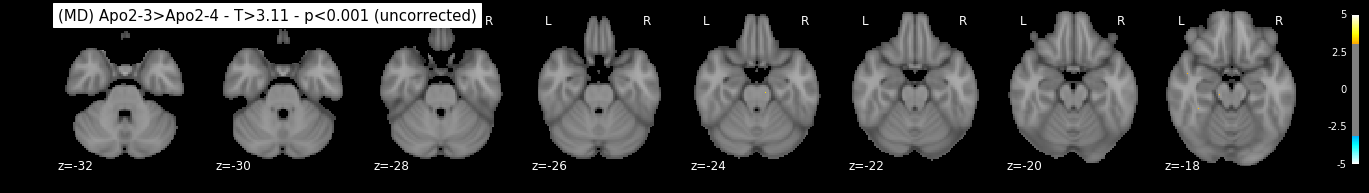

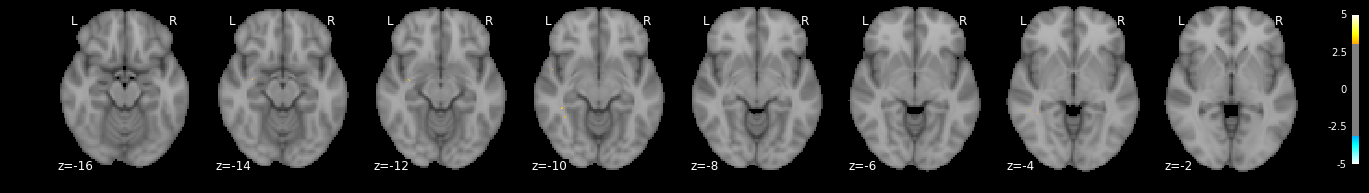

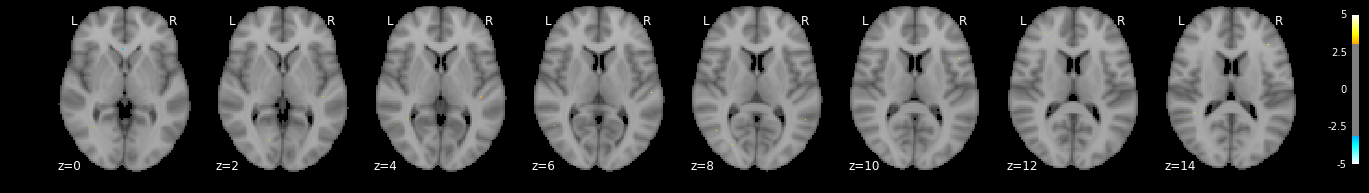

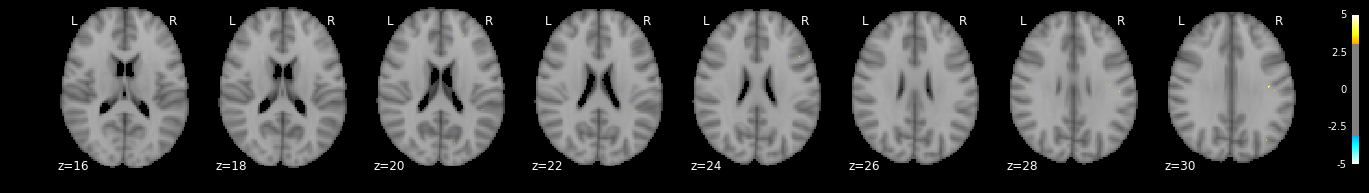

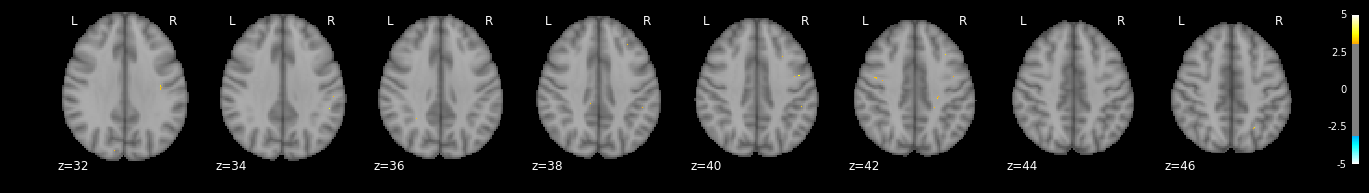

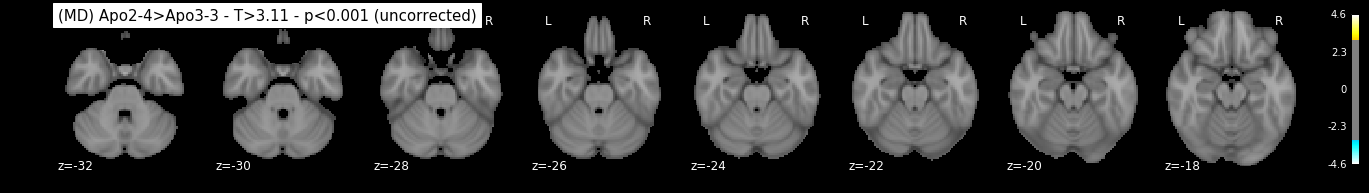

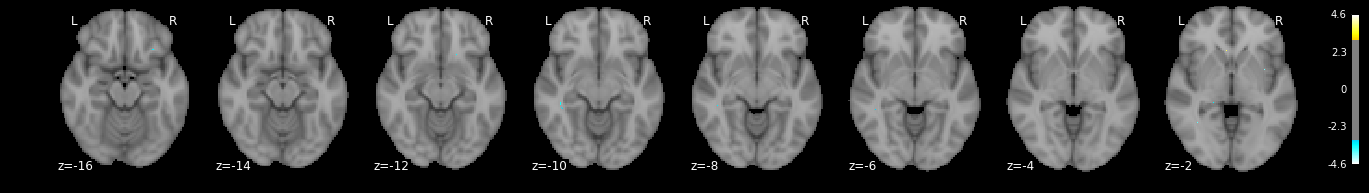

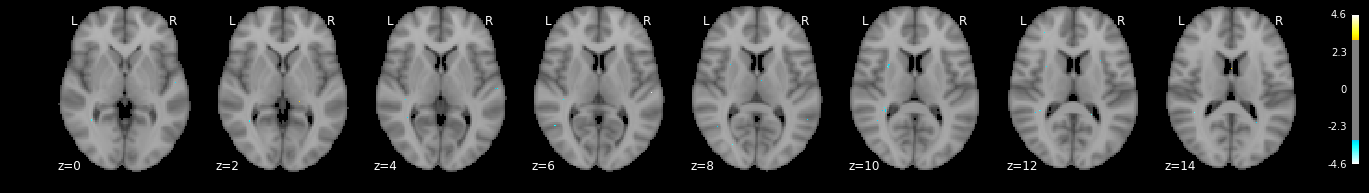

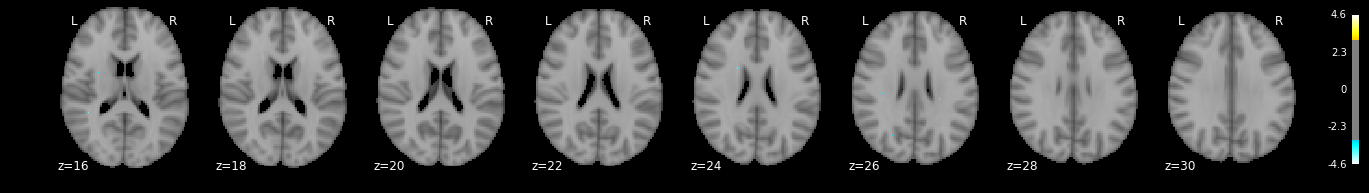

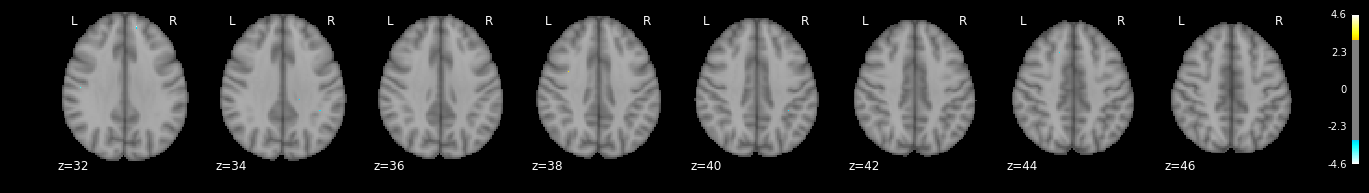

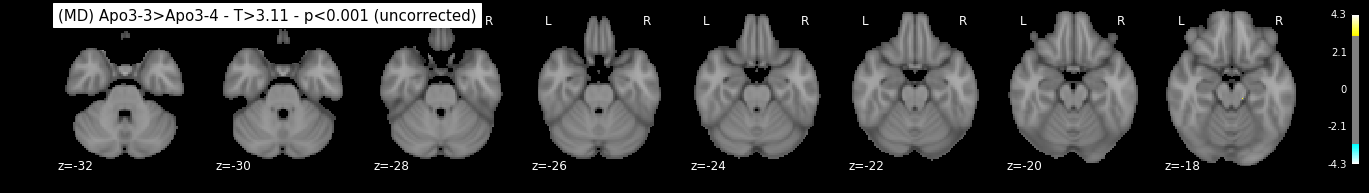

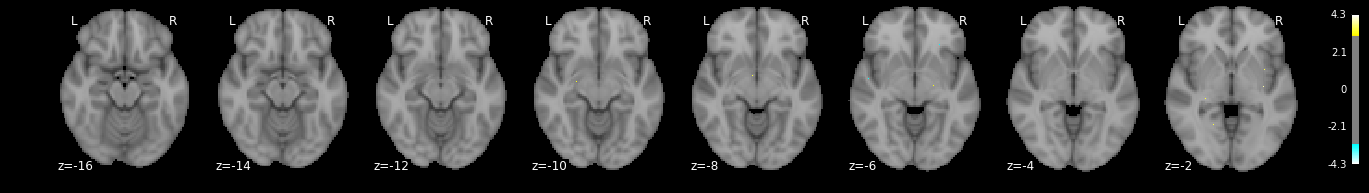

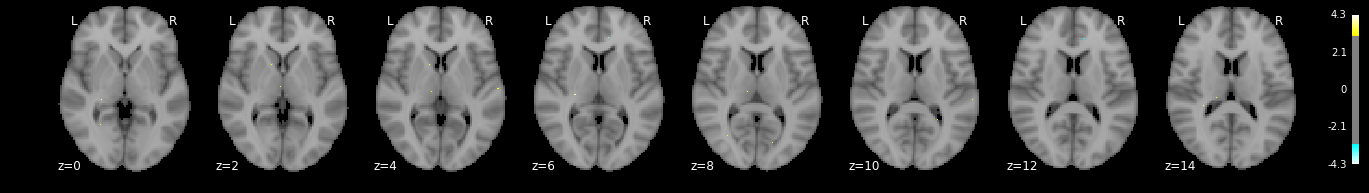

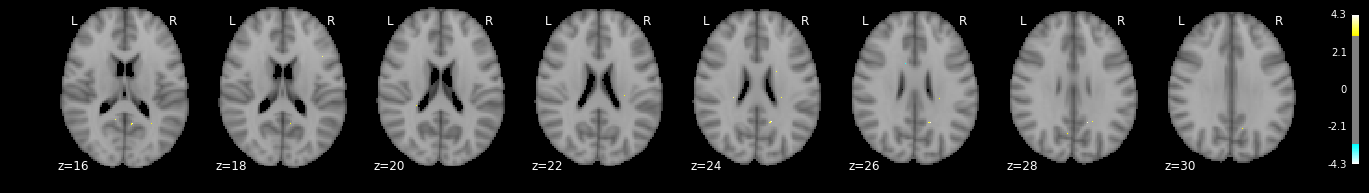

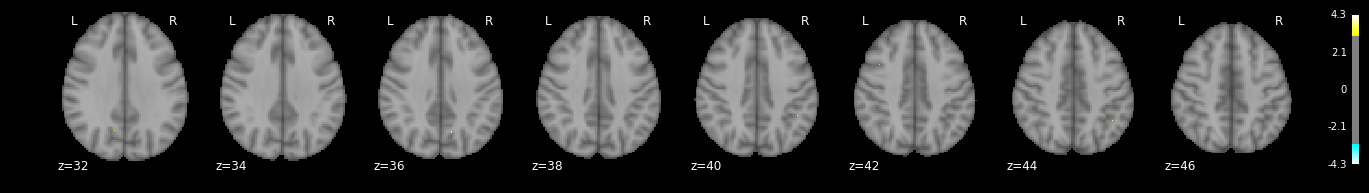

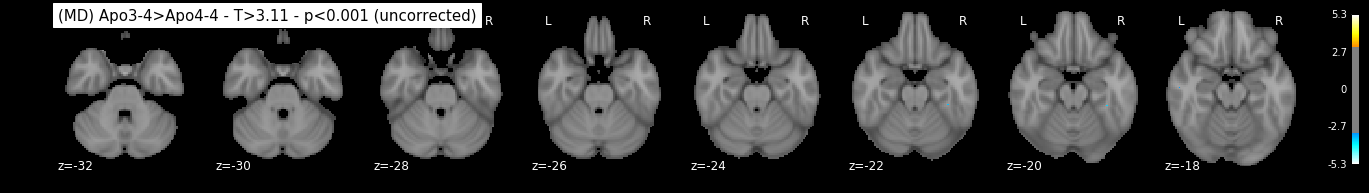

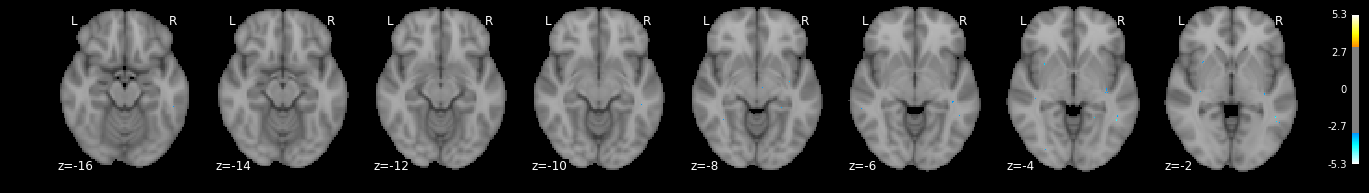

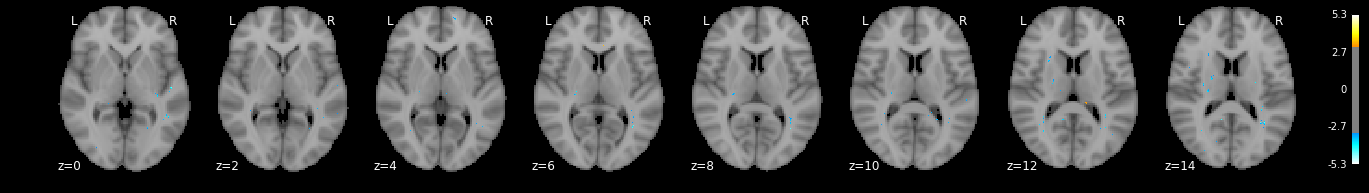

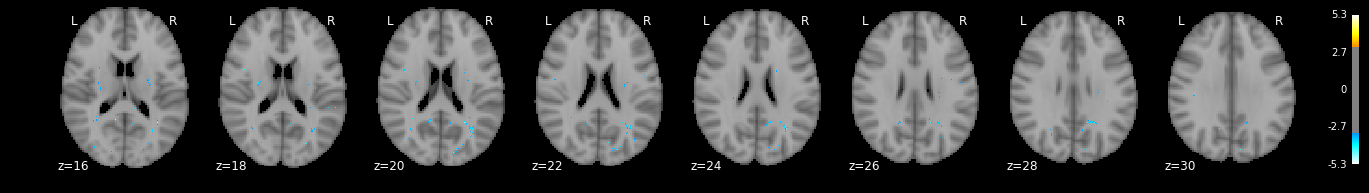

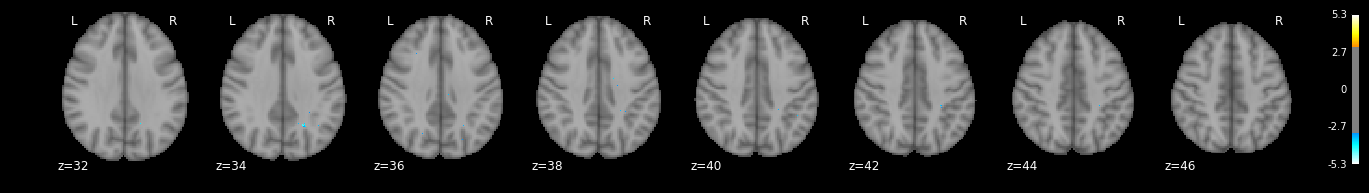

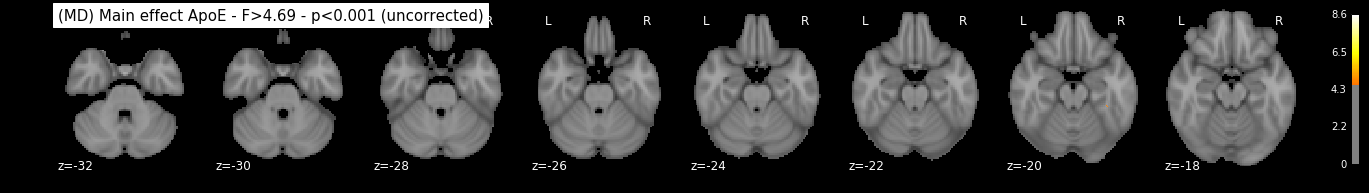

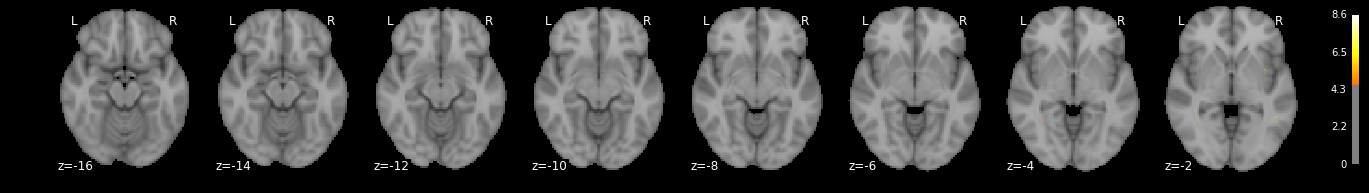

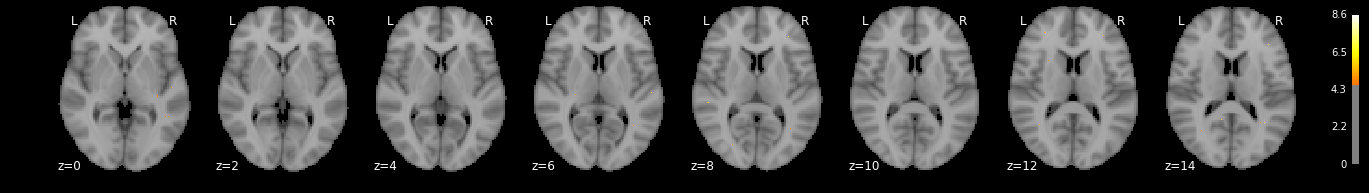

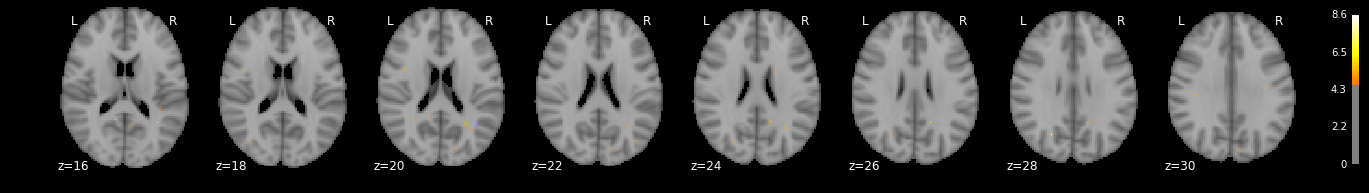

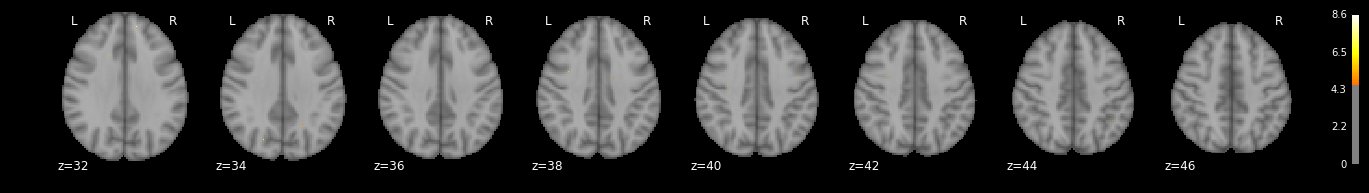

In [9]:
sections_allcontrasts(analysis_wd, 'MD', axis='z', contrasts=[1,2,3,4,5])